In [1]:
import data.particles_generator as pg
import ROOT
from ROOT import gSystem, gInterpreter
import seaborn
import data.madx_runner as mr
import pandas as pd
import approximator.run_approximator as ra
import os
home = "/home/rafalmucha/Pobrane/optic/"
path_to_project = home+"/optics_generator_python"
path_to_file = home+"/s/parametrization_6500GeV_0p4_185_reco.root"

Welcome to JupyROOT 6.16/00


In [2]:
"""
Get approximator from file. Use only once, since it initialize variables in ROOT, so with second use it is going
to explode. Sorry.
:param path_to_project: path to optics_generator_python. Needed files from it:
- properly initialized folder root_libs
- src/root_classes/include
:param path_to_file: path to file with serialized LHCOpticsApproximator object
:return: approximator object
"""
os.environ['LD_LIBRARY_PATH'] = path_to_project + "/root_libs"
gInterpreter.ProcessLine(".include " + path_to_project + "/src/root_classes/include")
gSystem.Load("LHCOpticsApproximator")
gInterpreter.ProcessLine('TFile *f=TFile::Open("' + path_to_file + '");')
gInterpreter.ProcessLine('std::auto_ptr<LHCOpticsApproximator> apr_near150 = std::auto_ptr<LHCOpticsApproximator>((LHCOpticsApproximator*) f->Get("ip5_to_station_220_v_1_lhcb2"));')
gInterpreter.ProcessLine("f->Close()")
gInterpreter.ProcessLine("double input[6];")
gInterpreter.ProcessLine("double output[5];")
aperture = ROOT.apr_near150
approximator = aperture

Error in <TCling::RegisterModule>: cannot find dictionary module FitCint_rdict.pcm


In [3]:
input_positions = pg.generate_from_range(0, 0, 1,
                                        0, 0, 1,
                                        0.0000, 0, 1,
                                        0, 0, 1,
                                        0, 0.15, 100,
                                        0, 0, 1)

In [4]:
approximator_output = ra.transport(approximator, input_positions)

In [5]:

madx_output = mr.compute_trajectory(input_positions.T, "/home/rafalmucha/Pobrane/optic/s/", 1)

Text(0.5, 1.0, 'Histogram of theta y at begin')

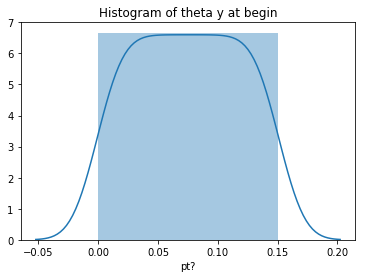

In [7]:
theta_y = pd.Series(input_positions.T[4], name = "pt?")
seaborn.distplot(theta_y, bins = 20).set_title("Histogram of theta y at begin")

Text(0.5, 1.0, 'Histogram of theta y at the end, madx transport')

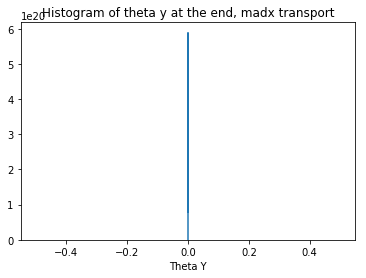

In [8]:
theta_y = pd.Series(madx_output["end"].T[5], name = "Theta Y")
seaborn.distplot(theta_y, bins = 20).set_title("Histogram of theta y at the end, madx transport")

Text(0.5, 1.0, 'Histogram of theta y at the end, \napproximator transport')

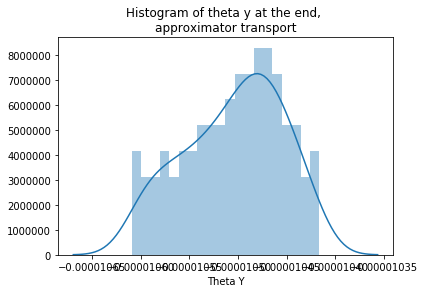

In [9]:
theta_y = pd.Series(approximator_output.T[3], name = "Theta Y")
seaborn.distplot(theta_y, bins = 20).set_title("Histogram of theta y at the end, \napproximator transport")

In [ ]:
x = madx_output["start"].T[4]
x

In [ ]:
x = madx_output["end"].T[4]
x

In [ ]:
theta_x = madx_output["end"].T[4]
theta_x